In [1]:
# correct imports for the assignment, decision tree and random forest
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
emails = pd.read_csv('emails.csv', header=0)

In [3]:
print(emails.head())

   known sender  long length  has keyword search  has keyword grade  \
0             0            0                   1                  1   
1             1            1                   0                  1   
2             0            1                   1                  1   
3             1            1                   1                  1   
4             0            1                   0                  0   

   has keyword lottery  y  
0                    0 -1  
1                    0 -1  
2                    1 -1  
3                    0 -1  
4                    0 -1  


In [4]:
X = emails.drop(columns=['y'])
y = emails['y']

In [5]:
print(X)

   known sender  long length  has keyword search  has keyword grade  \
0             0            0                   1                  1   
1             1            1                   0                  1   
2             0            1                   1                  1   
3             1            1                   1                  1   
4             0            1                   0                  0   
5             1            0                   1                  1   
6             0            0                   1                  0   
7             1            0                   0                  0   
8             1            0                   1                  1   
9             1            1                   1                  1   

   has keyword lottery  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
5                    1  
6                    0  
7                 

In [6]:
print(y)

0   -1
1   -1
2   -1
3   -1
4   -1
5    1
6    1
7    1
8    1
9   -1
Name: y, dtype: int64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 5)
(2, 5)
(8,)
(2,)


## Decision Tree

In [52]:
tree = DecisionTreeClassifier(max_depth=1, random_state=0)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [53]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.875
Accuracy on test set: 1.000


In [44]:
from sklearn.tree import export_graphviz
feature_cols = emails.columns[:5].tolist()
export_graphviz(tree, out_file="tree.dot", class_names=["-1", "1"], feature_names=feature_cols, impurity=False, filled=True)

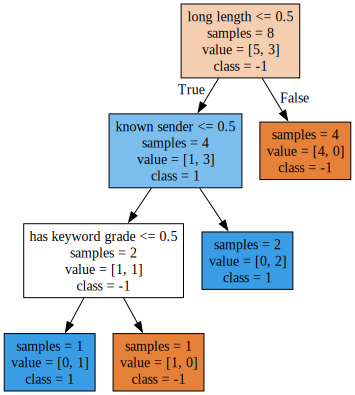

In [45]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Random Forest

In [66]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [67]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.875
Accuracy on test set: 0.500
